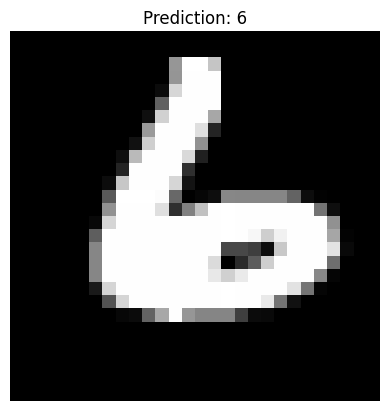

In [48]:
from google.cloud import aiplatform
from tensorflow.keras.datasets import mnist
import numpy as np
from scripts.helper import preprocess_data
import matplotlib.pyplot as plt

(x_train, labels_train), (x_test, labels_test) = mnist.load_data()
x_train, y_train, x_test, y_test = preprocess_data(x_train, labels_train, x_test, labels_test)

PROJECT_NUMBER=''
ENDPOINT_ID=''
endpoint = aiplatform.Endpoint(endpoint_name=f"projects/{PROJECT_NUMBER}/locations/us-central1/endpoints/{ENDPOINT_ID}")

import random
 
random_index = random.randint(0, len(x_test))
image = x_test[random_index,:,:]
x_test_list = np.asarray(np.expand_dims(image, axis=0)).astype(np.float32).tolist()
pred = endpoint.predict(instances=x_test_list).predictions

plt.title(f'Prediction: {np.argmax(pred)}')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()